<div class="span5 alert alert-info">
<b>
<h2>    
Exploratory Data Analysis:
</h2>    
</b>    
</div>

<div class="span5 alert alert-info">
<b>
Business request:
</b>    
</div>

**Predict destination country of a new user.**

<div class="span5 alert alert-info">
<b>    
Overview of data:
</b>    
</div>

**Destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found,no booking),and 'other'.** 

**All users are from USA.**

**The training and test sets are split by dates.** 

**In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted).** 

**In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.** 

<div class="span5 alert alert-info">
<b>    
Datasets available:
</b>    
</div>

**train_users_2.csv** 

**test_users.csv**

**sessions.csv**

**countries.csv**

**age_gender_bkts.csv**

**sample_submission_NDF.csv**

****

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="span5 alert alert-info">
<b>    
Train data:
</b>    
</div>

In [167]:
df_train = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/train_users_2.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [169]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


**Setting Plot Style**

In [170]:
plt.style.use('ggplot')

**Transformations to datetime format**

In [171]:
df_train['timestamp_first_active'] = df_train['timestamp_first_active'].astype(str)
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'])

df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])


**Adding month of first booking**

In [172]:
df_train['month_of_first_booking'] = df_train['date_first_booking'].dt.month

Text(0.5, 0, 'Month of first booking')

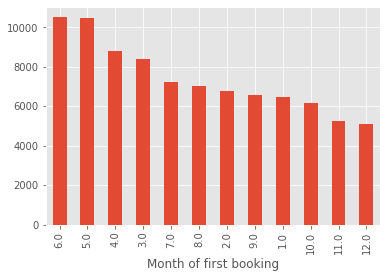

In [173]:
cat_counts = df_train["month_of_first_booking"].value_counts()

cat_counts.plot.bar()
plt.xlabel("Month of first booking")

**Mid year(ie May, June) seems to have relatively higher first time bookings.**

**Year end has relatively low first bookings.**

In [174]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_of_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2.0


In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
month_of_first_booking     88908 non-null float64
dtypes: datetime

****

<div class="span5 alert alert-info">
<b>    
Session data
</b>    
</div>

In [176]:
df_sessions = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/sessions.csv",encoding = "ISO-8859-1",na_values=['-unknown-',"NA",'-'])

In [177]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [178]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


**Categorising less frequent 'action' to 'Others' ,keeping a threshold of 24000**

In [179]:
df_sessions['action'].value_counts()

show               2768278
index               843699
search_results      725226
personalize         706824
search              536057
                    ...   
update_message           1
revert_to_admin          1
deauthorize              1
desks                    1
deactivated              1
Name: action, Length: 359, dtype: int64

**Appending 'action' to action col for simplicity after pivoting**

In [180]:
df_sessions['action'] = 'action_' + df_sessions['action']

In [181]:
df_sessions['action'] = df_sessions['action'].mask(df_sessions['action'].map(df_sessions['action'].value_counts()) < 24000,'Others')

**Grouping and getting aggregated mean value of sec_elapsed**

In [182]:
df_sessions_grp = df_sessions.groupby(['user_id','action']).agg({'secs_elapsed':'mean'}).reset_index()

**Just keeping action and ignoring action_type, action_detail which seem redundant. Devicetype can also be ignored 
considering train data already has a first_device_type.**

In [183]:
df_sessions_grp.head()

,user_id,action,secs_elapsed
0,00023iyk9l,Others,0.0
1,00023iyk9l,action_ajax_refresh_subtotal,723.5
2,00023iyk9l,action_confirm_email,567165.0
3,00023iyk9l,action_dashboard,1115.5
4,00023iyk9l,action_header_userpic,1599.0


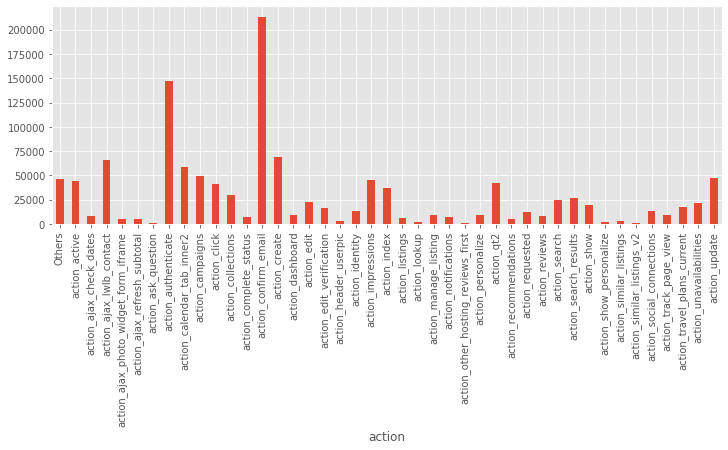

In [184]:
plt.figure(figsize=(12,4))

action_ser = df_sessions_grp.groupby('action')['secs_elapsed'].agg('mean')
action_ser.plot.bar('action','secs_elapsed')


**From above plot, Action 'confirm_email' and 'authenticate' has highest mean secsElapsed in a session.**

In [185]:
df_sessions_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429842 entries, 0 to 1429841
Data columns (total 3 columns):
user_id         1429842 non-null object
action          1429842 non-null object
secs_elapsed    1359218 non-null float64
dtypes: float64(1), object(2)
memory usage: 32.7+ MB


**Pivoting and adding action as columns**

In [186]:
df_sessions_expanded = df_sessions_grp.pivot(index='user_id', columns='action', values='secs_elapsed').reset_index()

In [187]:
df_sessions_expanded.columns

Index(['user_id', 'Others', 'action_active', 'action_ajax_check_dates',
       'action_ajax_lwlb_contact', 'action_ajax_photo_widget_form_iframe',
       'action_ajax_refresh_subtotal', 'action_ask_question',
       'action_authenticate', 'action_calendar_tab_inner2', 'action_campaigns',
       'action_click', 'action_collections', 'action_complete_status',
       'action_confirm_email', 'action_create', 'action_dashboard',
       'action_edit', 'action_edit_verification', 'action_header_userpic',
       'action_identity', 'action_impressions', 'action_index',
       'action_listings', 'action_lookup', 'action_manage_listing',
       'action_notifications', 'action_other_hosting_reviews_first',
       'action_personalize', 'action_qt2', 'action_recommendations',
       'action_requested', 'action_reviews', 'action_search',
       'action_search_results', 'action_show', 'action_show_personalize',
       'action_similar_listings', 'action_similar_listings_v2',
       'action_social_conne

**Joining session and train**

In [188]:
df_train_join = df_train.join(df_sessions_expanded.set_index('user_id'), on='id')

In [189]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 60 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age                                     125461 non-null float64
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 

In [190]:
df_train_join['age'].value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64

**From above we see some outliers like 1938..which we replace with mean age.**

In [191]:
mean_age = df_train_join[df_train_join['age'] <= 100].age.mean()
df_train_join.loc[(df_train_join['age'] >= 100),'age'] = mean_age

In [192]:
mean_age = df_train_join['age'].mean()
df_train_join['age'].fillna(mean_age,inplace=True)

In [193]:
#Coverts age to age groups
def AgeToAgeGroup(age,interval):    
    age_grp = (age/interval).astype(int)
    age_grp = (age_grp*interval).astype(str) + '-' + ((age_grp*interval)+(interval-1)).astype(str)
    return age_grp


In [194]:
#replace age with age grp
df_train_join['age'] = AgeToAgeGroup(df_train_join['age'],5)

In [195]:
df_train_join = df_train_join.rename(columns={"age": "age_bucket"})

In [196]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age_bucket,signup_method,signup_flow,language,affiliate_channel,...,action_search_results,action_show,action_show_personalize,action_similar_listings,action_similar_listings_v2,action_social_connections,action_track_page_view,action_travel_plans_current,action_unavailabilities,action_update
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,35-39,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,35-39,facebook,0,en,seo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,55-59,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,40-44,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,40-44,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


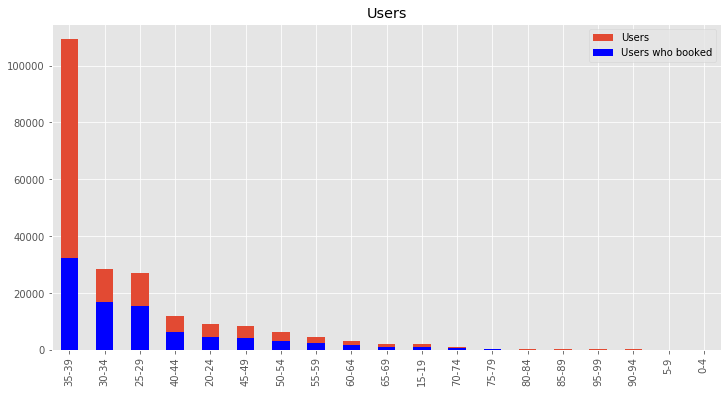

In [219]:
plt.figure(figsize=(12,6))

age_bucket_counts = df_train_join['age_bucket'].value_counts()
ax = age_bucket_counts.plot.bar(subplots=True,label = 'Users')

#users who did booking
df_bookings = df_train_join[df_train_join['country_destination'] != 'NDF']

age_bucket_counts = df_bookings['age_bucket'].value_counts()
age_bucket_counts.plot.bar(color ='blue',label = 'Users who booked')

ax[0].legend(loc=1)  

**Most users are from age bucket 35-39.**

**There is a lot of variance in count as age bucket varies.**

**Age bucket 35-39 has relatively low booking to Non booking ratio.**

**Users of Age bucket 30-34 and 25-29 has relatively higher booking to not booking ratio.** 

In [165]:
df_no_bookings = df_train_join[df_train_join['country_destination'] == 'NDF']
df_no_bookings['month_of_first_booking']

0        NaN
1        NaN
11       NaN
13       NaN
14       NaN
          ..
213446   NaN
213447   NaN
213448   NaN
213449   NaN
213450   NaN
Name: month_of_first_booking, Length: 124543, dtype: float64

**Obvious, month of first booking for users not done booking(NDF) is NaN** 

In [33]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 60 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age_bucket                              213451 non-null object
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 n

****

<div class="span5 alert alert-info">
<b>    
Countries data
</b>    
</div>

In [34]:
df_countries = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/countries.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [35]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null int64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 688.0+ bytes


In [36]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


**Keeping standard language abbreviations**

In [37]:
df_countries['destination_language'] = df_countries['destination_language'].map({'eng':'en','deu':'de',
                                                                                 'spa':'es','fra':'fr','nld':'nl',
                                                                                 'por': 'pt','ita':'it'})
                                                                    

In [38]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,en,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,en,0.00
2,DE,51.165707,10.452764,7879.5680,357022,de,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,es,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fr,92.06


Text(0, 0.5, 'language_levenshtein_distance from US lang')

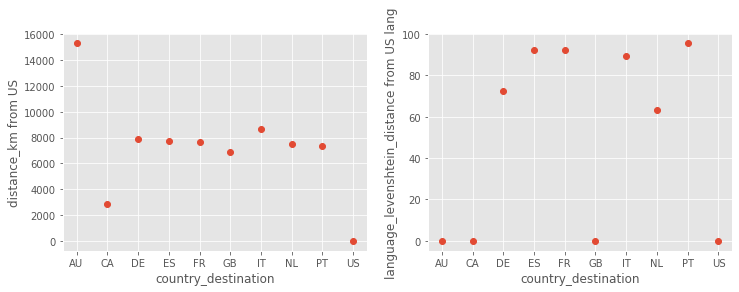

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(df_countries['country_destination'],df_countries['distance_km'],'o')
plt.xlabel("country_destination")
plt.ylabel("distance_km from US")


plt.subplot(1, 2, 2)
plt.plot(df_countries['country_destination'],df_countries['language_levenshtein_distance'],'o')
plt.xlabel("country_destination")
plt.ylabel("language_levenshtein_distance from US lang")


**AU looks farest from US**

**ES, FR, PT have highest language_levenshtein_distance i.e these languages have highest difference score from US english.**

**Dropping data from countries and joining with train data**

In [40]:
df_countries_ = df_countries[['country_destination','distance_km','destination_km2','destination_language','language_levenshtein_distance']] 

**Adding destination language preference or likeliness to user in train data**

In [41]:
lang_df_countries = df_countries_.groupby(['destination_language','country_destination'])['country_destination'].agg(count = 'count').reset_index()
lang_df_countries['country_destination'] = 'des_lang_' + lang_df_countries['country_destination']

In [42]:
lang_df_countries = lang_df_countries.pivot(index='destination_language', columns='country_destination', values='count').reset_index()
lang_df_countries

country_destination,destination_language,des_lang_AU,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US
0,de,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,en,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,es,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,fr,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,it,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [43]:
df_train_join.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age_bucket', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'month_of_first_booking',
       'Others', 'action_active', 'action_ajax_check_dates',
       'action_ajax_lwlb_contact', 'action_ajax_photo_widget_form_iframe',
       'action_ajax_refresh_subtotal', 'action_ask_question',
       'action_authenticate', 'action_calendar_tab_inner2', 'action_campaigns',
       'action_click', 'action_collections', 'action_complete_status',
       'action_confirm_email', 'action_create', 'action_dashboard',
       'action_edit', 'action_edit_verification', 'action_header_userpic',
       'action_identity', 'action_impressions', 'action_index',
       'action_listings', 'action_lookup', 'action_manage_listing',
       'action_notificat

In [44]:
df_train_join['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [45]:
df_train_join = df_train_join.join(lang_df_countries.set_index('destination_language'), on='language')
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age_bucket,signup_method,signup_flow,language,affiliate_channel,...,des_lang_AU,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,35-39,facebook,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,35-39,facebook,0,en,seo,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,55-59,basic,3,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,40-44,facebook,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,40-44,basic,0,en,direct,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [46]:
#moving target to End
target_col_at_end = ['country_destination']
    
df_train_join = df_train_join[[c for c in df_train_join if c not in target_col_at_end] 
    + [c for c in target_col_at_end if c in df_train_join]]

In [47]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 70 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age_bucket                              213451 non-null object
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 n

In [48]:
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age_bucket,signup_method,signup_flow,language,affiliate_channel,...,des_lang_CA,des_lang_DE,des_lang_ES,des_lang_FR,des_lang_GB,des_lang_IT,des_lang_NL,des_lang_PT,des_lang_US,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,35-39,facebook,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,35-39,facebook,0,en,seo,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,55-59,basic,3,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,40-44,facebook,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,40-44,basic,0,en,direct,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,US


****

<div class="span5 alert alert-info">
<b>    
Gender data
</b>    
</div>

In [49]:
df_gender = pd.read_csv("../DataFiles/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [50]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [51]:
df_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


**Adding average age bucket population of destination countries with respect to user age bucket** 

In [52]:
pop_age_grp = df_gender.groupby(['age_bucket','country_destination'])['population_in_thousands'].agg(mean = np.mean).reset_index()
pop_age_grp['country_destination'] = 'age_grp_' + pop_age_grp['country_destination']

pop_age_grp.head()

,age_bucket,country_destination,mean
0,0-4,age_grp_AU,802.5
1,0-4,age_grp_CA,1018.0
2,0-4,age_grp_DE,1762.0
3,0-4,age_grp_ES,1235.0
4,0-4,age_grp_FR,1986.5


In [53]:
age_grp_countries = pop_age_grp.pivot(index='age_bucket', columns='country_destination', values='mean').reset_index()
age_grp_countries.head()

country_destination,age_bucket,age_grp_AU,age_grp_CA,age_grp_DE,age_grp_ES,age_grp_FR,age_grp_GB,age_grp_IT,age_grp_NL,age_grp_PT,age_grp_US
0,0-4,802.5,1018.0,1762.0,1235.0,1986.5,1934.5,1425.5,450.0,232.0,10547.0
1,10-14,725.0,956.0,1846.0,1156.5,1939.5,1730.5,1428.0,505.0,277.0,10558.5
2,100+,2.5,4.0,8.5,6.0,11.0,8.0,9.0,1.0,0.5,37.0
3,15-19,752.5,1031.5,2025.0,1057.0,1966.0,1823.5,1452.0,497.0,271.5,10797.5
4,20-24,803.5,1181.0,2213.5,1140.5,1993.5,2009.0,1557.5,515.5,280.0,11347.5


In [54]:
df_train_join = df_train_join.join(age_grp_countries.set_index('age_bucket'), on='age_bucket')
df_train_join.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age_bucket,signup_method,signup_flow,language,affiliate_channel,...,age_grp_AU,age_grp_CA,age_grp_DE,age_grp_ES,age_grp_FR,age_grp_GB,age_grp_IT,age_grp_NL,age_grp_PT,age_grp_US
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,35-39,facebook,0,en,direct,...,799.0,1190.5,2425.0,2041.5,1849.0,1971.5,2103.5,490.0,416.5,10340.5
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,35-39,facebook,0,en,seo,...,799.0,1190.5,2425.0,2041.5,1849.0,1971.5,2103.5,490.0,416.5,10340.5
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,55-59,basic,3,en,direct,...,726.5,1296.0,2989.5,1505.0,2032.0,1958.0,2022.5,580.5,354.5,10976.5
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,40-44,facebook,0,en,direct,...,829.0,1174.0,2596.0,1988.0,2221.5,2124.0,2419.5,582.5,417.0,10233.5
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,40-44,basic,0,en,direct,...,829.0,1174.0,2596.0,1988.0,2221.5,2124.0,2419.5,582.5,417.0,10233.5


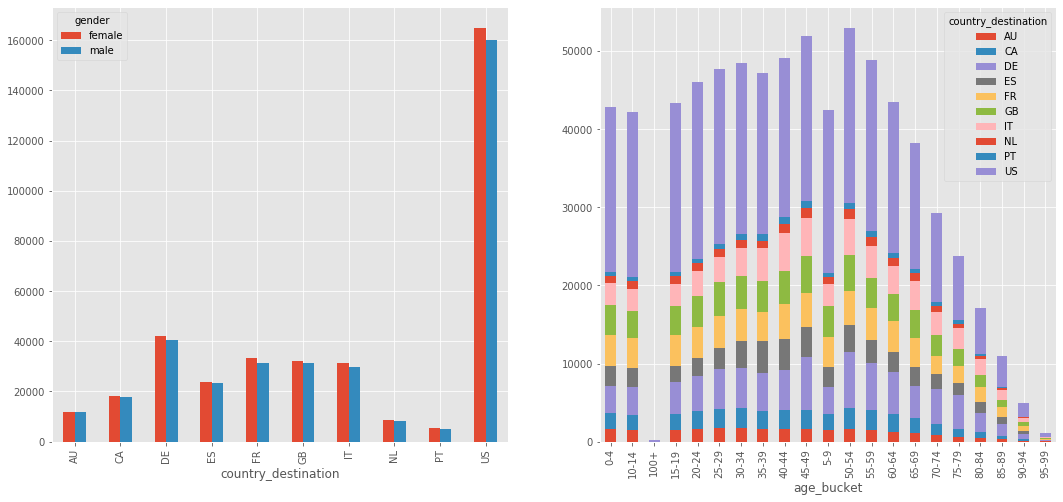

In [55]:
fig, (ax, ax2) = plt.subplots(figsize=(18,8),ncols=2)

df_gender.groupby(['country_destination','gender'])['population_in_thousands'].agg('sum').unstack().plot(kind='bar',ax=ax)
pd.pivot_table(df_gender, values="population_in_thousands", index="age_bucket", columns="country_destination", aggfunc=np.sum).plot.bar(stacked=True,ax=ax2)


**US seem to have highest population, also female population is higher compared to male for all destination countries.** 

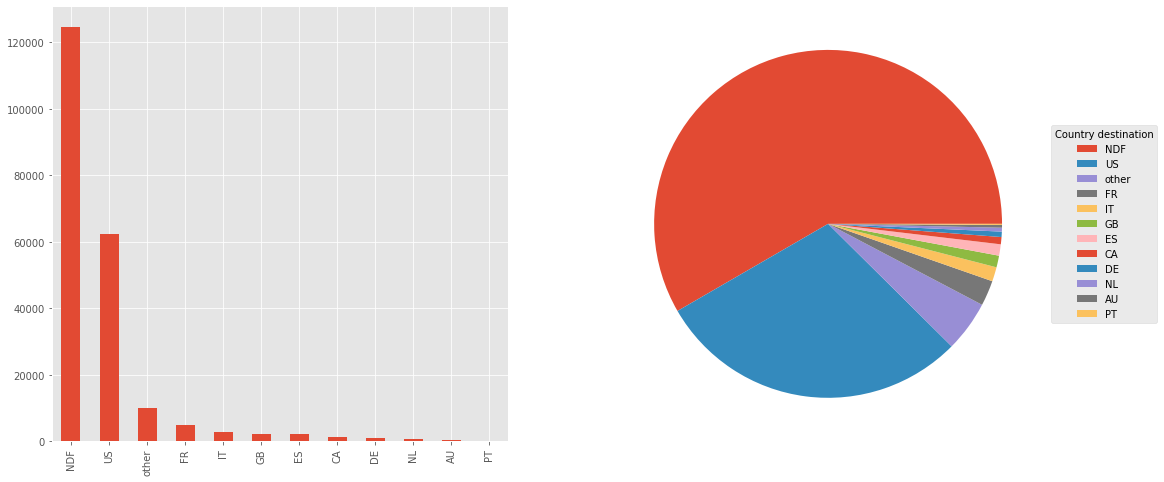

In [56]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)

cat_counts = df_train_join["country_destination"].value_counts()
cat_counts.plot.bar()

plt.subplot(1, 2, 2)
plt.pie(cat_counts)
plt.legend(cat_counts.index,
          title="Country destination",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


**Most of the users land up doing no bookings.**

**US is the destination country for most of the users, could be because all user data are from people of US which also implies that most users do bookings within the country.** 

**Dataset seem imbalanced with NDF and US contributing max to the data.** 

Text(0, 0.5, 'count')

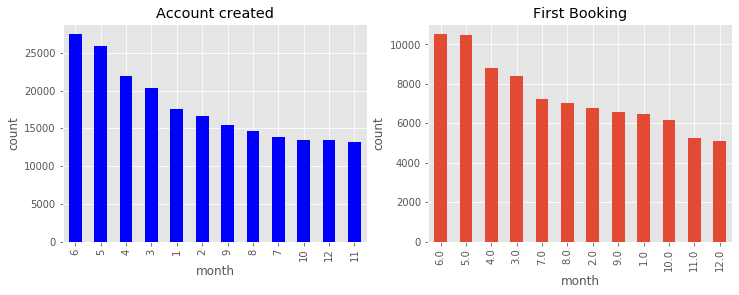

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
df_train_join['date_account_created'].dt.month.value_counts().plot.bar(title='Account created',color='blue')
plt.xlabel('month')
plt.ylabel('count')

plt.subplot(1, 2, 2)
df_train_join['date_first_booking'].dt.month.value_counts().plot.bar(title='First Booking')
plt.xlabel('month')
plt.ylabel('count')


**Shapes of Account created and first bookings over months are almost same.**

**First half of the year has the max accounts created.**

**June and May are months of highest first bookings.**

In [61]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 80 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  117763 non-null object
age_bucket                              213451 non-null object
signup_method                           213451 non-null object
signup_flow                             213451 non-null int64
language                                213451 non-null object
affiliate_channel                       213451 non-null object
affiliate_provider                      213451 non-null object
first_affiliate_tracked                 207386 non-null object
signup_app                              213451 non-null object
first_device_type                       213451 n

****

<div class="span5 alert alert-info">
<b>    
Encodings
</b>    
</div>

In [62]:
from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df
    

In [63]:
#label encoding
cols = ['gender','age_bucket','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','country_destination']        
en_df = Categorical_encoding(df_train_join,cols)  
df_train_join = en_df.label_encoding()

In [64]:
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 80 columns):
id                                      213451 non-null object
date_account_created                    213451 non-null datetime64[ns]
timestamp_first_active                  213451 non-null datetime64[ns]
date_first_booking                      88908 non-null datetime64[ns]
gender                                  213451 non-null int64
age_bucket                              213451 non-null int64
signup_method                           213451 non-null int64
signup_flow                             213451 non-null int64
language                                213451 non-null int64
affiliate_channel                       213451 non-null int64
affiliate_provider                      213451 non-null int64
first_affiliate_tracked                 213451 non-null int64
signup_app                              213451 non-null int64
first_device_type                       213451 non-null 

****

<div class="span5 alert alert-info">
<b>    
Insights: 
</b>    
</div>

**1. Mid year (ie May, June) seems to have relatively higher first time bookings.**

**2. Year end has relatively low first time bookings.**

**3. First half of the year has the max accounts created.**

**4. Most users are from age bucket 35-39.**

**5. There is a lot of variance in count as age bucket varies.**

**6. Age bucket 35-39 has relatively low booking to Non booking ratio.**

**7. Users of Age bucket 30-34 and 25-29 has relatively higher booking to not booking ratio.** 

**8. ES, FR, PT have highest language_levenshtein_distance i.e these languages have highest difference score from US english.**

**9. US seem to have highest population, also female population is higher compared to male for all destination countries.** 

**10. Most of the users land up doing no bookings and most of them are of age group 35-39.**

**11. US is the destination country for most of the users, could be because all user data are from people of US which also implies that most users do bookings within the country.** 

**12. Dataset seem imbalanced with NDF and US contributing max to the data.** 

**13. Shapes of Account created and first bookings over months are almost same.**

****

<div class="span5 alert alert-info">
<b>    
Product Recommendations: 
</b>    
</div>

**1. Mid year (ie May, June) being the peak time for users doing first time bookings special offers and discounts can 
be given considering they are first time users and retaining these users is of great value.** 

**2. Year end has relatively less first time bookings, mostly users are old users who have already been there before so must be treated accordingly.**

**3. Age bucket 35-39 is the highest age group of users and have highest ratio of not booking to booking.This age group is of great value and a thought should be given as to why they are not booking, understand what are there likes and dislikes what could be the reason of not booking.This age grp is primarily of young families having kids, mid to senior level working professionals, all these factors needs to considered.**

**4. Age bucket 30-34 and 25-29 has relatively lower not booking to booking ratio which implies they are most likely to book.Considering they are from younger age grp they should be treated accordingly.** 

**5. As all the users are from US and most of the bookings are done in US itself, implies most of the bookings are done in the same country.So keeping in mind the US culture,services like the complimentary breakfast...etc. would be of a good value.**


****

In [ ]:
#for further analysis
df_train_join.to_csv("../DataFiles/air_bnb_clean_data/air_bnb_reduced_data"+".csv",index=False)